In [278]:
# Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [279]:
# Importar archivo de las compañías
URL = 'https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_01.csv'
df_company_trips = pd.read_csv(URL)
df_company_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


El dataframe consta de 64 registros los cuales son consistentes con el tipo de dato esperado, es decir, la columna del nombre de la compañía es tipo object (ya que es un texto) y la columna trips_amount es tipo entero, ya que es la cantidad de viajes realizados por esa compañía.

In [280]:
df_company_trips.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


## Descripción de los datos
### 1. Número de empresas: 64
### 2. Rango de viajes (trips_amount):
- Mínimo: 2 viajes
- Máximo: 19 558 viajes
### 3. Medidas de tendencia central:
- Media: ≈ 2 145 viajes
- Mediana (50%): ≈ 178.5 viajes

### 4. Dispersión:
- Desviación estándar: ≈ 3 812 viajes, muy alta comparada con la media.
- El 25% de las empresas registró 20.75 viajes o menos; el 50% tuvo 178.5 o menos y el 75% tuvo 2106.5 viajes o menos.

In [281]:
#Importar archivo de ubicaciones de decenso
URL = 'https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_04.csv'
df_drop_locations = pd.read_csv(URL)
df_drop_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


El dataframe consta de 94 registros los cuales son consistentes con el tipo de dato esperado, es decir, la columna dropoff_location_name es tipo object (ya que es un texto) y la columna average_trips es tipo flotante, ya que es la cantidad promedio de destinos realizados.

In [282]:
df_drop_locations.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


<function matplotlib.pyplot.show(close=None, block=None)>

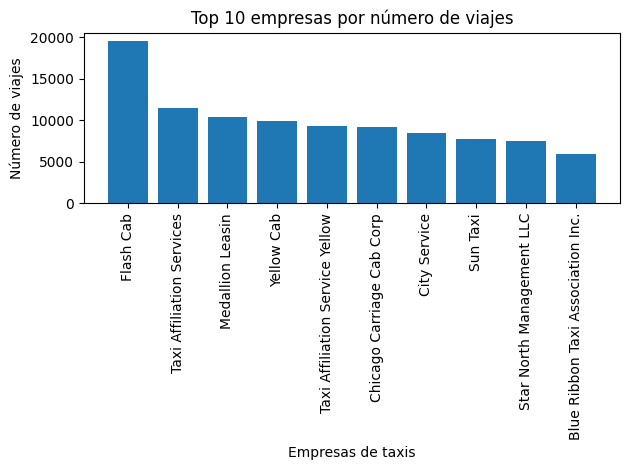

In [283]:
df_top10_companies = df_company_trips.sort_values('trips_amount', ascending=False).head(10)

plt.Figure()
plt.bar(df_top10_companies['company_name'],df_top10_companies['trips_amount'])
plt.xlabel('Empresas de taxis')
plt.ylabel('Número de viajes')
plt.title('Top 10 empresas por número de viajes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show

### Conclusión:

La cantidad total de viajes realizados por las 10 principales empresas suman casi 10K, siendo "Flash Cab" la compañía con más viajes (casi el 20% de todos los viajes en la gráfica).


### Identificar los 10 principales barrios en términos de finalización del recordido

<function matplotlib.pyplot.show(close=None, block=None)>

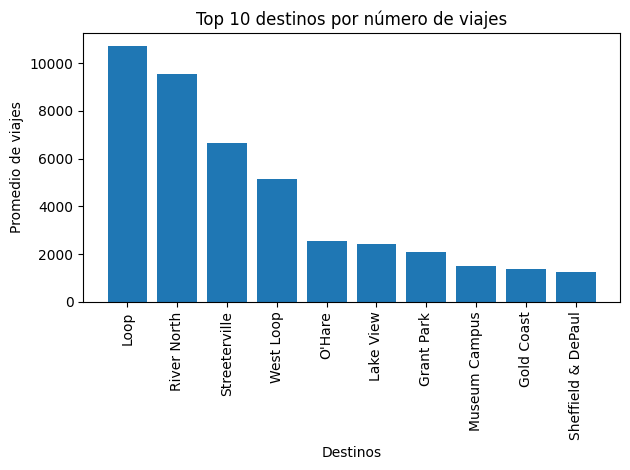

In [284]:
df_top10_locations = df_drop_locations.sort_values('average_trips', ascending=False).head(10)

plt.Figure()
plt.bar(df_top10_locations['dropoff_location_name'],df_top10_locations['average_trips'])
plt.xlabel('Destinos')
plt.ylabel('Promedio de viajes')
plt.title('Top 10 destinos por número de viajes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show

## Prueba de hipótesis

- H0. La duración promedio de los viajes desde Loop hasta el aeropuerto O'Hare ES IGUAL en los sábados lluviosos.
- H1. La duración promedio de los viajes desde Loop hasta el aeropuerto O'Hare NO ES IGUAL en los sábados lluviosos

- Alpha = 0.05



In [285]:
# Importar el archivo CSV.
URL = 'https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_07.csv'
df_trips = pd.read_csv(URL)


<function matplotlib.pyplot.show(close=None, block=None)>

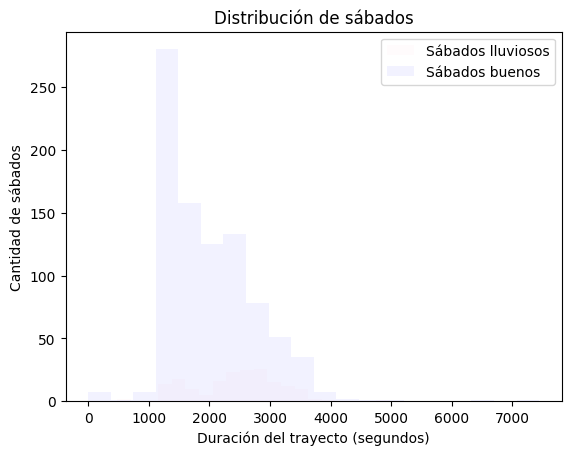

In [286]:
# Convertir el campo start_ts a tipo fecha
df_trips['start_ts'] = pd.to_datetime(df_trips['start_ts'])

# Convertir la duración del viaje a enteros
df_trips['duration_seconds'] = df_trips['duration_seconds'].astype(int)

# Agregar la columna del día de la semana.
df_trips['weekday'] = df_trips['start_ts'].dt.dayofweek

# Extraer a un dataframe solo los días sábado.
df_saturdays = df_trips[df_trips['weekday'] == 5]

df_good_saturdays = df_saturdays[df_saturdays['weather_conditions'] == 'Good']['duration_seconds']
df_bad_saturdays = df_saturdays[df_saturdays['weather_conditions'] == 'Bad']['duration_seconds']

# Obtener medias y desviaciones standard
mean_bad_days, std_bad_days = df_bad_saturdays.mean(), df_bad_saturdays.std()
mean_good_days, std_good_days = df_good_saturdays.mean(), df_good_saturdays.std()

# Establecer valor alpha
alpha_value = 0.05

# Histograma comparativo
plt.hist(df_bad_saturdays, bins=20, alpha=alpha_value, label='Sábados lluviosos',color= 'pink')
plt.hist(df_good_saturdays, bins=20, alpha=alpha_value, label='Sábados buenos', color='blue')
plt.ylabel('Cantidad de sábados')
plt.xlabel('Duración del trayecto (segundos)')
plt.legend()
plt.title('Distribución de sábados')
plt.show

In [287]:
# Validar la igualdad de las varianzas si p_le > 0.05
stat_le, p_le = stats.levene(df_bad_saturdays, df_good_saturdays)

if p_le > 0.05:
    print('Las varianzas son estadísticamente iguales, usar equal_var=True en la prueba ttest_ind')
else:
    print('Las varianzas son estadísticamente diferentes, usar equal_var=False en la prueba ttest_ind')

t_stat, p_val = stats.ttest_ind(df_bad_saturdays, df_good_saturdays, equal_var=(p_le > 0.05))

print(f"Resultados de la prueba t: {t_stat:.5f}, p = {p_val}")

Las varianzas son estadísticamente iguales, usar equal_var=True en la prueba ttest_ind
Resultados de la prueba t: 6.94618, p = 6.517970327099473e-12


### Conclusiones: 

Con base en los resultados obtenidos:

Estadístico t = 6.94618
p-valor ≈ 6.52 × 10⁻¹²
y tomando α = 0.05:

Se rechaza H0. Hay evidencia estadística de que las duraciones promedio de los viajes NO SON IGUALES entre sábados lluviosos y sábados sin lluvia.